# Linear regression
(based on Andrew Ng coursera Machine Learning course)

---


In [83]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Display plots inline

In [84]:
%matplotlib inline
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = 16, 10

## Ploting the data

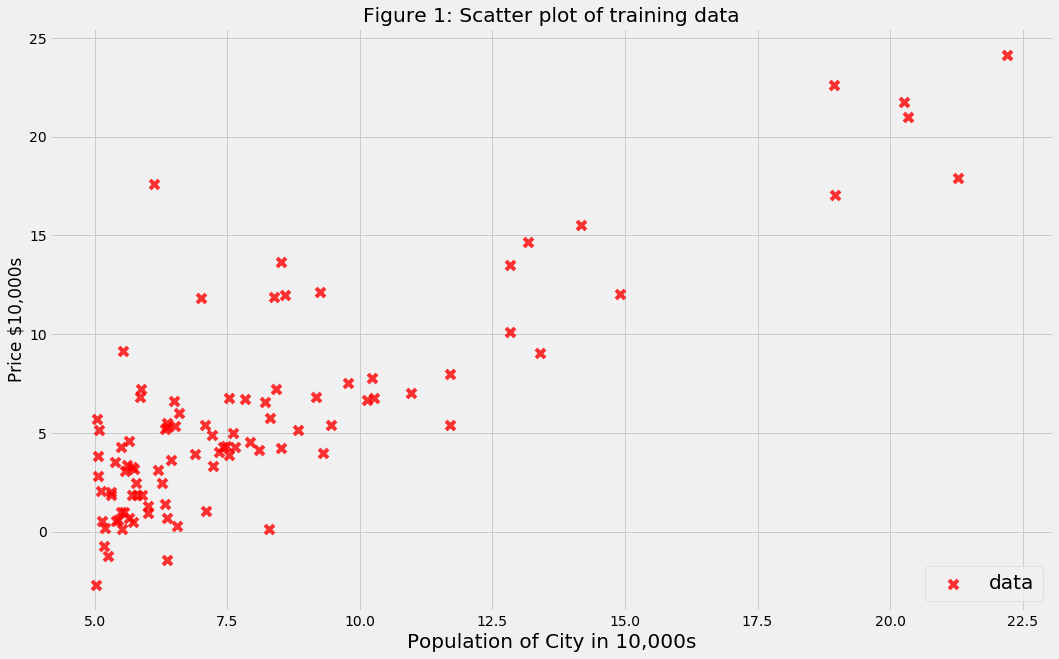

In [85]:
data = pd.read_csv('ex1data1.txt', header = None)
data.columns = ['x_train', 'y_train']
plt.scatter(data['x_train'], data['y_train'], 80, 'r', 'x', alpha = 0.8, label = 'data')
plt.legend(loc = 'lower right', prop = {'size': 20})
plt.title('Figure 1: Scatter plot of training data')
plt.xlabel('Population of City in 10,000s', fontsize = 20)
plt.ylabel('Price $10,000s')
plt.show()

In [86]:
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
y = np.array([data['y_train']]).T #pay attention on []. To fix 2nd-dimention size
theta = np.zeros((X.shape[1], 1))

## Cost function

In [87]:
def cost_func(X, y, theta) :
    return (0.5 / X.shape[0]) * np.sum((np.dot(X, theta) - y) ** 2, dtype = float) 

## Gradient discent

In [88]:
def gradient_discent(X, y, theta, alpha, iterations) :
    J_history = np.zeros((iterations, 1))
    m = X.shape[0]
    for i in range(iterations):
        J_der = np.dot(X, theta) - y
        theta = theta - (alpha / m) * np.dot(J_der.T, X).T
        J_history[i] = cost_func(X, y, theta)
    return theta, J_history 

array([[-3.63029144],
       [ 1.16636235]])

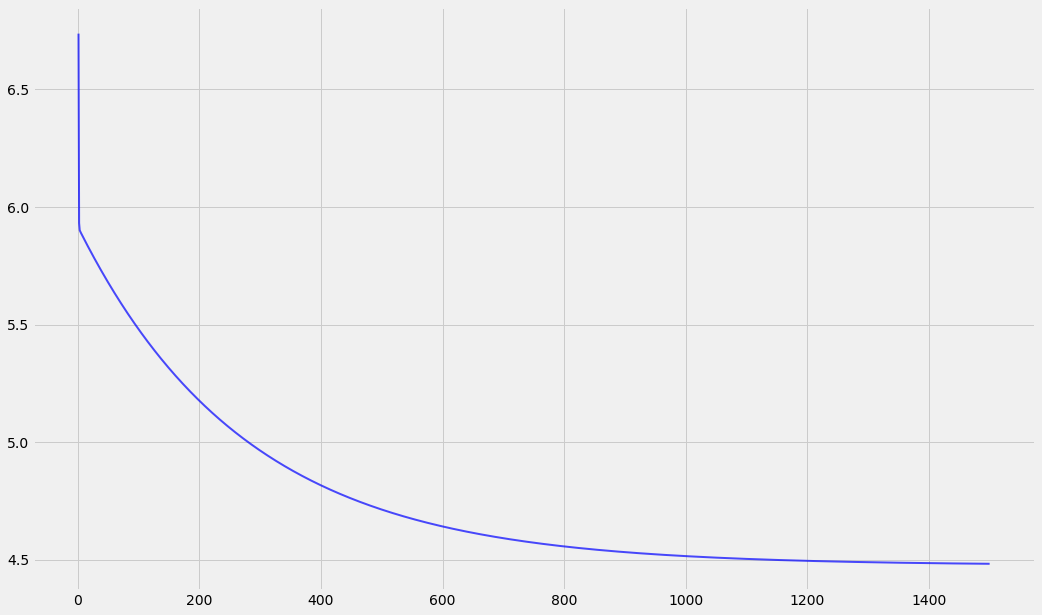

In [89]:
alpha = 0.01
iterations = 1500
[theta, J_history] = gradient_discent(X, y, theta, alpha, iterations)
plt.plot(np.linspace(1, 1500, 1500), J_history, 'b', alpha = 0.7, label = 'function',  linewidth = 2)
theta #plot that shows convergens of cost function

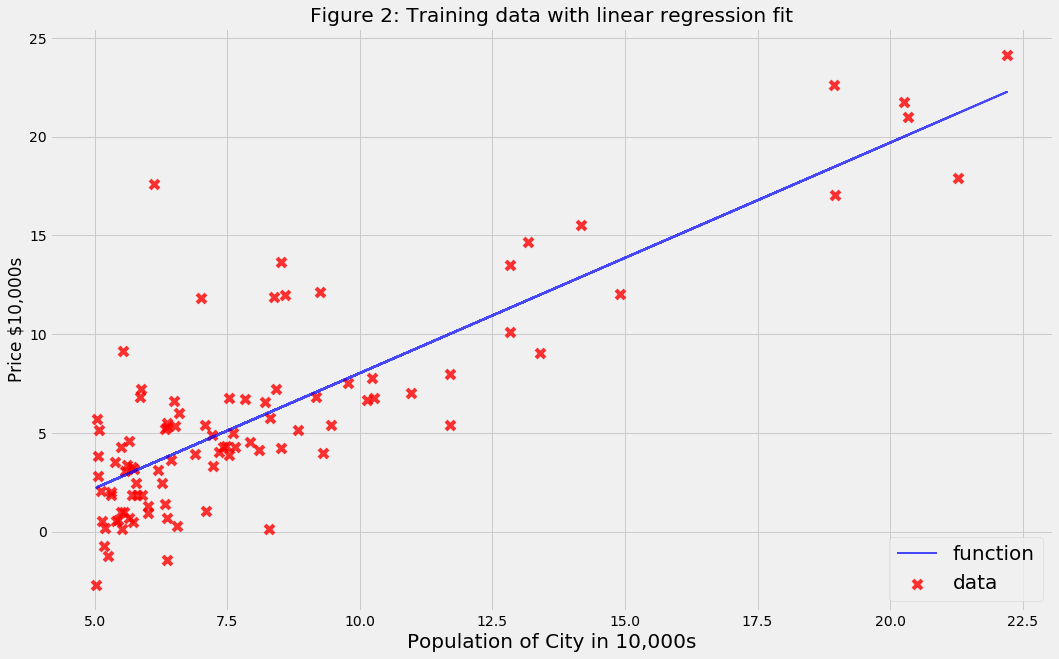

In [90]:
data.columns = ['x_train', 'y_train']
plt.scatter(data['x_train'], data['y_train'], 80, 'r', 'x', alpha = 0.8, label = 'data')
plt.plot(X[:,1], np.dot(X, theta), 'b', alpha = 0.7, label = 'function',  linewidth = 2)
plt.legend(loc = 'lower right', prop = {'size': 20})
plt.title('Figure 2: Training data with linear regression fit')
plt.xlabel('Population of City in 10,000s', fontsize = 20)
plt.ylabel('Price $10,000s')
plt.show()

## Visualizing the cost function

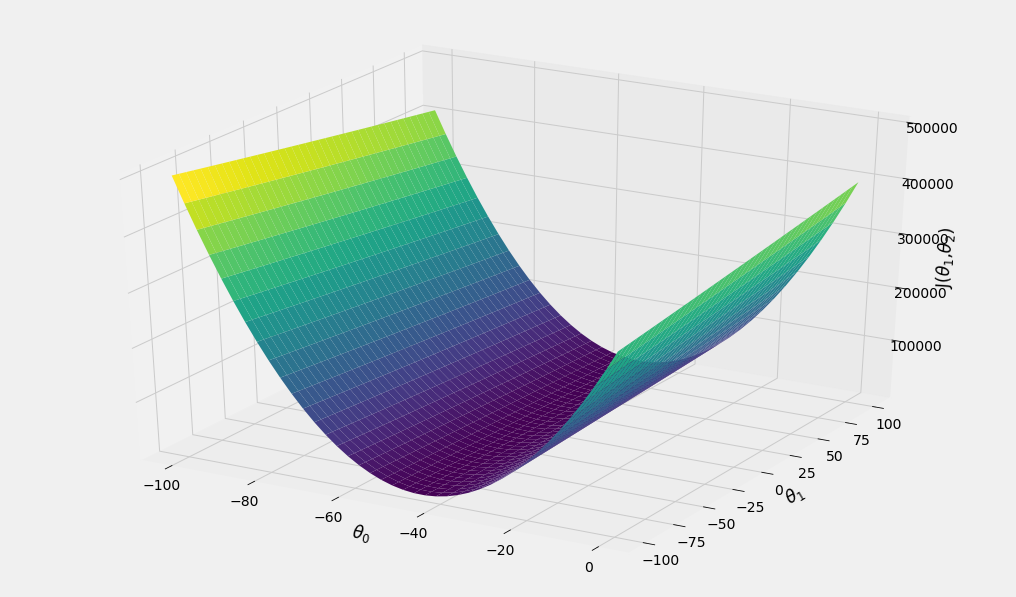

In [150]:
theta0_vals = np.linspace(-100, 0, 40)
theta1_vals = np.linspace(-100, 100, 40)
t = np.zeros((2,1))
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

for i in range(theta0_vals.shape[0]):
    for j in range(theta1_vals.shape[0]):
        t[0], t[1] = theta0_vals[i], theta1_vals[j]
        J_vals[i][j] = cost_func(X, y, t)

theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
ax = plt.axes(projection = '3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none');
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'J($\theta_1$,$\theta_2$)')
plt.show()

In [92]:
theta

array([[-3.63029144],
       [ 1.16636235]])

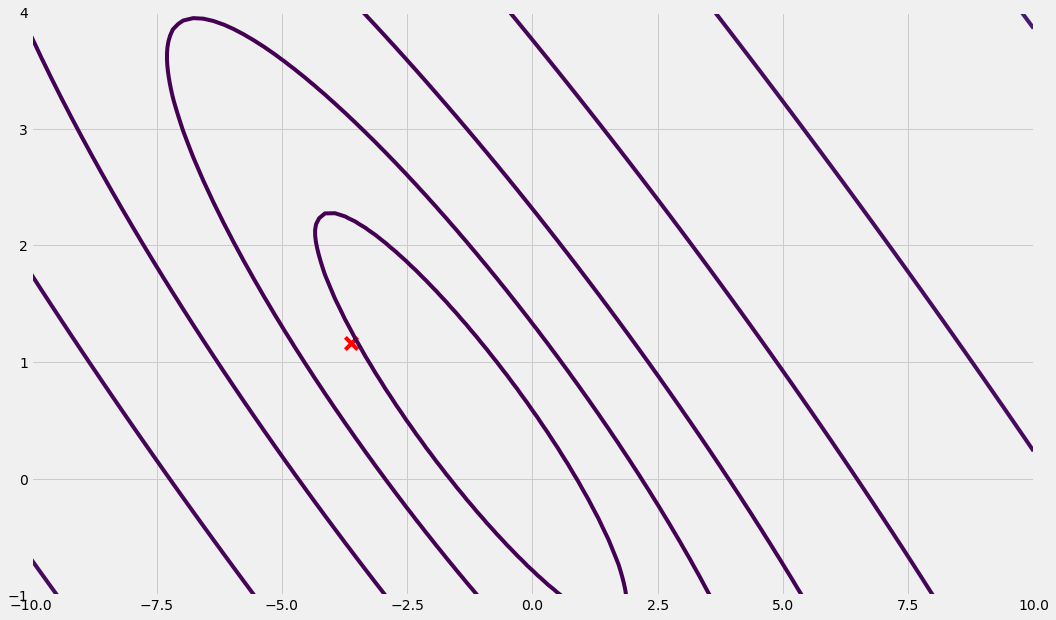

In [128]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

t = np.zeros((theta.shape[0],1))
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

for i in range(theta0_vals.shape[0]):
    for j in range(theta1_vals.shape[0]):
        t[0], t[1] = theta0_vals[i], theta1_vals[j]
        J_vals[i][j] = cost_func(X, y, t)
        
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-4, 4, 22))
plt.scatter(theta[0], theta[1], 150, c = 'r', marker = 'x', alpha = 1)